# 1. 라이브러리 및 데이터 불러오기

## 1. 라이브러리

In [39]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',300)
import folium
import geopandas as gpd
from tqdm import tqdm
from pyproj import Proj, Transformer
tqdm.pandas()  # pandas의 tqdm 확장 활성화
import random

#### 성심당 전체데이터.zip 파일의 각 .zip 파일 명칭을 각각 다음과 같이 변경하였음.
유동인구 → people, 카드매출(cell id별) → card sales1, 카드매출(지역별 업종 유입고객) → card sales2

## 2.데이터셋

In [40]:
import zipfile
import pandas as pd

zip_file_path = '../data/성심당 전체데이터.zip'

with zipfile.ZipFile(zip_file_path, 'r') as outer_zip:
    # 'card sales1.zip' 파일 열기
    with outer_zip.open('card sales1.zip') as inner_zip_file:
        # 내부 ZIP 파일을 ZipFile 객체로 바로 사용
        with zipfile.ZipFile(inner_zip_file) as inner_zip:
            # 내부 파일명 목록을 가져와 패턴을 선택
            file_names = inner_zip.namelist()
            if any('대전중구' in name for name in file_names):
                file_prefix = '대전중구_set1_'
            else:
                file_prefix = '┤δ└ⁿ┴▀▒╕_set1_'
            
            # 7월부터 12월 파일 읽기
            for month in range(7, 13):
                broken_file_name = f'{file_prefix}2023{month:02d}.csv'
                if broken_file_name in file_names:
                    var_name = f'cell2023{month:02d}'  # 동적으로 변수명 생성
                    try:
                        globals()[var_name] = pd.read_csv(inner_zip.open(broken_file_name), encoding='euc-kr')
                    except UnicodeDecodeError:
                        print(f"{broken_file_name} 파일을 'euc-kr'로 읽는 데 실패했습니다.")
                else:
                    print(f"파일을 찾을 수 없음: {broken_file_name}")

            # 1월부터 6월 파일 읽기
            for month in range(1, 7):
                broken_file_name = f'{file_prefix}2024{month:02d}.csv'
                if broken_file_name in file_names:
                    var_name = f'cell2024{month:02d}'  # 동적으로 변수명 생성
                    try:
                        globals()[var_name] = pd.read_csv(inner_zip.open(broken_file_name), encoding='euc-kr')
                    except UnicodeDecodeError:
                        print(f"{broken_file_name} 파일을 'euc-kr'로 읽는 데 실패했습니다.")
                else:
                    print(f"파일을 찾을 수 없음: {broken_file_name}")

In [41]:
import zipfile
import pandas as pd

zip_file_path = '../data/성심당 전체데이터.zip'

with zipfile.ZipFile(zip_file_path, 'r') as outer_zip:
    # 'card sales2.zip' 파일 열기
    with outer_zip.open('card sales2.zip') as inner_zip_file:
        # 내부 ZIP 파일을 ZipFile 객체로 바로 사용
        with zipfile.ZipFile(inner_zip_file) as inner_zip:
            # 내부 파일명 목록을 가져와 패턴을 선택
            file_names = inner_zip.namelist()
            if any('대전중구' in name for name in file_names):
                file_prefix = '대전중구_set2_'
            else:
                file_prefix = '┤δ└ⁿ┴▀▒╕_set2_'
            
            # 7월부터 12월 파일 읽기
            for month in range(7, 13):
                broken_file_name = f'{file_prefix}2023{month:02d}.csv'
                if broken_file_name in file_names:
                    var_name = f'hdong2023{month:02d}'  # 동적으로 변수명 생성
                    try:
                        globals()[var_name] = pd.read_csv(inner_zip.open(broken_file_name), encoding='euc-kr')
                    except UnicodeDecodeError:
                        print(f"{broken_file_name} 파일을 'euc-kr'로 읽는 데 실패했습니다.")
                else:
                    print(f"파일을 찾을 수 없음: {broken_file_name}")

            # 1월부터 6월 파일 읽기
            for month in range(1, 7):
                broken_file_name = f'{file_prefix}2024{month:02d}.csv'
                if broken_file_name in file_names:
                    var_name = f'hdong2024{month:02d}'  # 동적으로 변수명 생성
                    try:
                        globals()[var_name] = pd.read_csv(inner_zip.open(broken_file_name), encoding='euc-kr')
                    except UnicodeDecodeError:
                        print(f"{broken_file_name} 파일을 'euc-kr'로 읽는 데 실패했습니다.")
                else:
                    print(f"파일을 찾을 수 없음: {broken_file_name}")

In [42]:
유동인구정의서 = pd.read_csv("../data/유동인구정의서.csv") ; 카드매출정의서 = pd.read_csv("../data/카드매출정의서.csv")
상권정보_데이터코드 = pd.read_csv("../data/상권정보_데이터코드.csv") ; 상권정보_업종분류 = pd.read_csv("../data/상권정보_업종분류.csv")
국토조사 = pd.read_csv('../data/국토지리정보원_국토조사_(격자)500M.csv')
업종 = pd.read_csv("../data/업종코드.csv") ; hdong = pd.read_csv("../data/행정동코드.csv")

# 2. 전처리

## 1. card sales1 데이터

In [43]:
# DataFrame 리스트 생성
cell_dfs = [cell202307, cell202308, cell202309, cell202310, cell202311, cell202312, cell202401, cell202402, cell202403, cell202404, cell202405, cell202406]

# NaN 제거 작업 수행
cell_dfs = [df[df['업종소분류'].notna()] for df in cell_dfs]

# 각각의 DataFrame에 다시 할당
cell202307, cell202308, cell202309, cell202310, cell202311, cell202312, cell202401, cell202402, cell202403, cell202404, cell202405, cell202406 = cell_dfs

## 2. card sales2 데이터

In [44]:
# DataFrame 리스트 생성
hdong_dfs = [hdong202307, hdong202308, hdong202309, hdong202310, hdong202311, hdong202312, hdong202401, hdong202402, hdong202403, hdong202404, hdong202405, hdong202406]

# 열 제외 및 NaN 제거 작업 수행
hdong_dfs = [df.drop(columns=["이용건수_재난지원금", "이용금액_재난지원금"]) for df in hdong_dfs]
hdong_dfs = [df[df['광역시_유입'].notna()] for df in hdong_dfs]
hdong_dfs = [df[df['업종소분류'].notna()] for df in hdong_dfs]
hdong_dfs = [df[df['연령'].notna()] for df in hdong_dfs]
hdong_dfs = [df[df['성별'].notna()] for df in hdong_dfs]
hdong_dfs = [df[df['행정동_상권'].notna()] for df in hdong_dfs]

# 각각의 DataFrame에 다시 할당
hdong202307, hdong202308, hdong202309, hdong202310, hdong202311, hdong202312, hdong202401, hdong202402, hdong202403, hdong202404, hdong202405, hdong202406 = hdong_dfs

## 3. 컬럼명 매칭

### 1. 읍면동명 결합

#### 강원특별자치시 51에서 42로 변경

In [45]:
hdong['행정동코드'] = hdong['행정동코드'].astype(str).str[:-2].astype(int)
hdong['시군구코드'] = hdong['행정동코드'].astype(str).str[:-3].astype(int)
hdong['시도코드'] = hdong['시군구코드'].astype(str).str[:-3].astype(int)

In [46]:
# 앞자리가 51인 경우에만 42로 변경하는 함수 정의
def replace_prefix_51_with_42(column):
    return column.apply(lambda x: int('42' + str(x)[2:]) if str(x).startswith('51') else x)

# 행정동코드, 시도코드, 시군구코드 열의 앞자리가 51인 경우만 변경
hdong['행정동코드'] = replace_prefix_51_with_42(hdong['행정동코드'])
hdong['시도코드'] = replace_prefix_51_with_42(hdong['시도코드'])
hdong['시군구코드'] = replace_prefix_51_with_42(hdong['시군구코드'])


In [47]:
# DataFrame 리스트 생성
hdong_dfs = [hdong202307, hdong202308, hdong202309, hdong202310, hdong202311, hdong202312, hdong202401, hdong202402, hdong202403, hdong202404, hdong202405, hdong202406]

# 각 DataFrame에 대해 처리 수행
hdong_dfs = [
    df.merge(hdong[['행정동코드', '읍면동명']].drop_duplicates(subset=['행정동코드']), how='left', left_on='행정동_상권', right_on='행정동코드')
    .merge(hdong[['시도코드', '시도명']].drop_duplicates(subset=['시도코드']), how='left', left_on='광역시_유입', right_on='시도코드')
    .merge(hdong[['시군구코드', '시군구명']].drop_duplicates(subset=['시군구코드']), how='left', left_on='시군구_유입', right_on='시군구코드')
    .drop(columns=['행정동코드', '시도코드', '시군구코드'])
    .rename(columns={'읍면동명': '상권_읍면동명', '시도명': '유입_시도명', '시군구명': '유입_시군구명'})
    for df in hdong_dfs
]

# 각각의 DataFrame에 다시 할당
hdong202307, hdong202308, hdong202309, hdong202310, hdong202311, hdong202312, hdong202401, hdong202402, hdong202403, hdong202404, hdong202405, hdong202406 = hdong_dfs

### 2. 업종 확인 + 컬럼 생성

In [48]:
업종[업종['항목명'].str.contains("빵|제과|베이커리", na=False)]

,Unnamed: 0,대분류,소분류,항목명,업종소분류,중분류,중분류명
69,69,C,10712,빵류 제조업,C10712,10,식료품 제조업
627,627,G,46323,"빵류, 과자류, 당류, 초콜릿 도매업",G46323,46,도매 및 상품 중개업
714,714,G,47216,"빵류, 과자류 및 당류 소매업",G47216,47,소매업; 자동차 제외
846,846,I,56191,제과점업,I56191,56,음식점 및 주점업


In [49]:
# cell 데이터프레임에 업종소분류 추가
cell_dfs = [cell202307, cell202308, cell202309, cell202310, cell202311, cell202312, cell202401, cell202402, cell202403, cell202404, cell202405, cell202406]
cell_dfs = [df.merge(업종[['업종소분류', '항목명']], how='left', left_on='업종소분류', right_on='업종소분류') for df in cell_dfs]

# 각각의 DataFrame에 다시 할당
cell202307, cell202308, cell202309, cell202310, cell202311, cell202312, cell202401, cell202402, cell202403, cell202404, cell202405, cell202406 = cell_dfs

# hdong 데이터프레임에 업종소분류 추가
hdong_dfs = [hdong202307, hdong202308, hdong202309, hdong202310, hdong202311, hdong202312, hdong202401, hdong202402, hdong202403, hdong202404, hdong202405, hdong202406]
hdong_dfs = [df.merge(업종[['업종소분류', '항목명']], how='left', left_on='업종소분류', right_on='업종소분류') for df in hdong_dfs]

# 각각의 DataFrame에 다시 할당
hdong202307, hdong202308, hdong202309, hdong202310, hdong202311, hdong202312, hdong202401, hdong202402, hdong202403, hdong202404, hdong202405, hdong202406 = hdong_dfs

### 3. 날짜 관련 변수 생성

In [50]:
import datetime
import holidays  
kr_holidays = holidays.KR()

### 4. card sales2 값들 매핑

In [51]:
# DataFrame 리스트 생성
hdong_dfs = [hdong202307, hdong202308, hdong202309, hdong202310, hdong202311, hdong202312, hdong202401, hdong202402, hdong202403, hdong202404, hdong202405, hdong202406]

# 딕셔너리 정의
holiday_dict = {1: "휴일", 2: "평일"}
time_period_dict = {1: "06-11", 2: "11-15", 3: "15-18", 4: "18-22", 5: "22-06"}
personal_corp_dict = {1: "개인", 2: "법인"}
gender_dict = {'M': "남성", 'F': "여성"}
income_bracket_dict = {1: "2천만원미만", 2: "3천만원미만", 3: "5천만원미만", 4: "7천만원미만", 5: "1억원미만", 6: "1억원이상", 9: "구분없음"}
credit_rating_dict = {1: "1-3등급", 2: "4-6등급", 3: "7-10등급", 9: "등급없음"}

# 각 DataFrame에 매핑 적용
hdong_dfs = [
    df.assign(
        구분_휴일평일=df['구분_휴일평일'].map(holiday_dict),
        구분_시간대=df['구분_시간대'].map(time_period_dict),
        구분_개인법인=df['구분_개인법인'].map(personal_corp_dict),
        성별=df['성별'].map(gender_dict),
        추정소득구간=df['추정소득구간'].map(income_bracket_dict),
        신용등급구간=df['신용등급구간'].map(credit_rating_dict)
    ) for df in hdong_dfs
]

# 각각의 DataFrame에 다시 할당
hdong202307, hdong202308, hdong202309, hdong202310, hdong202311, hdong202312, hdong202401, hdong202402, hdong202403, hdong202404, hdong202405, hdong202406 = hdong_dfs

In [52]:
# 'cell202307'부터 'cell202406'까지의 DataFrame을 리스트에 저장합니다.
cell_data_list = [cell202307, cell202308, cell202309, cell202310, cell202311, cell202312, 
                  cell202401, cell202402, cell202403, cell202404, cell202405, cell202406]

# DataFrame들을 하나로 합칩니다.
cell_combined = pd.concat(cell_data_list, axis=0)

In [53]:
hdong_dfs = [hdong202307, hdong202308, hdong202309, hdong202310, hdong202311, hdong202312, hdong202401, hdong202402, hdong202403, hdong202404, hdong202405, hdong202406]

# DataFrame들을 하나로 합칩니다.
hdong_combined = pd.concat(hdong_dfs, axis=0)

# 3. 성심당 고객 확인

## 1. card sales1

In [54]:
cell_combined[(cell_combined['항목명'] == '제과점업')].sort_values(by=['이용건수'], ascending = False)

,기준일자,cell_id,업종대분류,업종중분류,업종소분류,이용건수,이용건수_지역화폐,이용건수_재난지원금,이용건수_기타,이용금액,이용금액_지역화폐,이용금액_재난지원금,이용금액_기타,항목명
23630,20231222,다바93a14a,I,56.0,I56191,1693,167,0,1526,56946890,4316326,0,52630564,제과점업
25536,20231224,다바93a14a,I,56.0,I56191,1689,127,0,1562,50358170,3341840,0,47016330,제과점업
32072,20240330,다바93a14a,I,56.0,I56191,1646,81,0,1565,41698300,1395530,0,40302770,제과점업
16949,20240316,다바93a14a,I,56.0,I56191,1634,66,0,1568,57654305,1200200,0,56454105,제과점업
24703,20231223,다바93a14a,I,56.0,I56191,1628,151,0,1477,52821490,4036915,0,48784575,제과점업
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15342,20240115,다바94a13a,I,56.0,I56191,1,0,0,1,6000,0,0,6000,제과점업
18553,20240118,다바94a13a,I,56.0,I56191,1,0,0,1,5000,0,0,5000,제과점업
20368,20240120,다바92b13b,I,56.0,I56191,1,0,0,1,2000,0,0,2000,제과점업
20887,20240121,다바90b13a,I,56.0,I56191,1,0,0,1,2000,0,0,2000,제과점업


## 2. card sales2

### 1. 성심당 이용고객 상위 5개 유형 파악

In [55]:
ssd = hdong_combined[(hdong_combined['상권_읍면동명'] == "은행선화동") & (hdong_combined['항목명'] == "제과점업") & (hdong_combined['광역시_유입'] != 30) & (hdong_combined['업력'] == "10년초과")]
ssd = ssd[ssd['구분_시간대'] != "22-06"]   # 성심당 이용시간이 아닌 것은 제외

In [56]:
ssd.sort_values(by=['이용건수'], ascending=False).head(5)

,기준년월,광역시_상권,시군구_상권,행정동_상권,업종대분류,업종중분류,업종소분류,업력,광역시_유입,시군구_유입,구분_휴일평일,구분_시간대,구분_개인법인,연령,성별,추정소득구간,신용등급구간,이용건수,이용건수_지역화폐,이용건수_기타,이용금액,이용금액_지역화폐,이용금액_기타,상권_읍면동명,유입_시도명,유입_시군구명,항목명
54935,202402,30,30140,30140535.0,I,56.0,I56191,10년초과,41.0,NaN,휴일,11-15,개인,2.0,여성,NaN,NaN,46,NaN,46.0,1072450,0,1072450,은행선화동,경기도,NaN,제과점업
54309,202401,30,30140,30140535.0,I,56.0,I56191,10년초과,41.0,NaN,휴일,11-15,개인,2.0,여성,NaN,NaN,43,NaN,43.0,977150,0,977150,은행선화동,경기도,NaN,제과점업
54648,202402,30,30140,30140535.0,I,56.0,I56191,10년초과,36.0,36110.0,휴일,11-15,개인,4.0,여성,5천만원미만,1-3등급,42,7.0,35.0,1282100,356500,925600,은행선화동,세종특별자치시,NaN,제과점업
62786,202308,30,30140,30140535.0,I,56.0,I56191,10년초과,41.0,NaN,휴일,15-18,개인,3.0,여성,NaN,NaN,34,NaN,34.0,755200,0,755200,은행선화동,경기도,NaN,제과점업
62421,202405,30,30140,30140535.0,I,56.0,I56191,10년초과,41.0,NaN,휴일,11-15,개인,2.0,여성,NaN,NaN,34,NaN,34.0,873000,0,873000,은행선화동,경기도,NaN,제과점업


In [57]:
ssd['유형'] = ssd['유입_시도명'] + '_' + ssd['연령'].astype('int').astype('str') + '0대_' + ssd['성별'] + '_' + ssd['구분_개인법인']
ssd['휴일평일_시간대'] = ssd['구분_휴일평일'] + '_' + ssd['구분_시간대']
ssd['유형_2'] = ssd['연령'].astype('int').astype('str') + '0대_' + ssd['성별'] + '_' + ssd['구분_개인법인']

#### 평일과 휴일 구분

In [58]:
ssd_평일 = ssd[ssd['구분_휴일평일'] == "평일"]
ssd_휴일 = ssd[ssd['구분_휴일평일'] == "휴일"]

### 2. 유입 시도

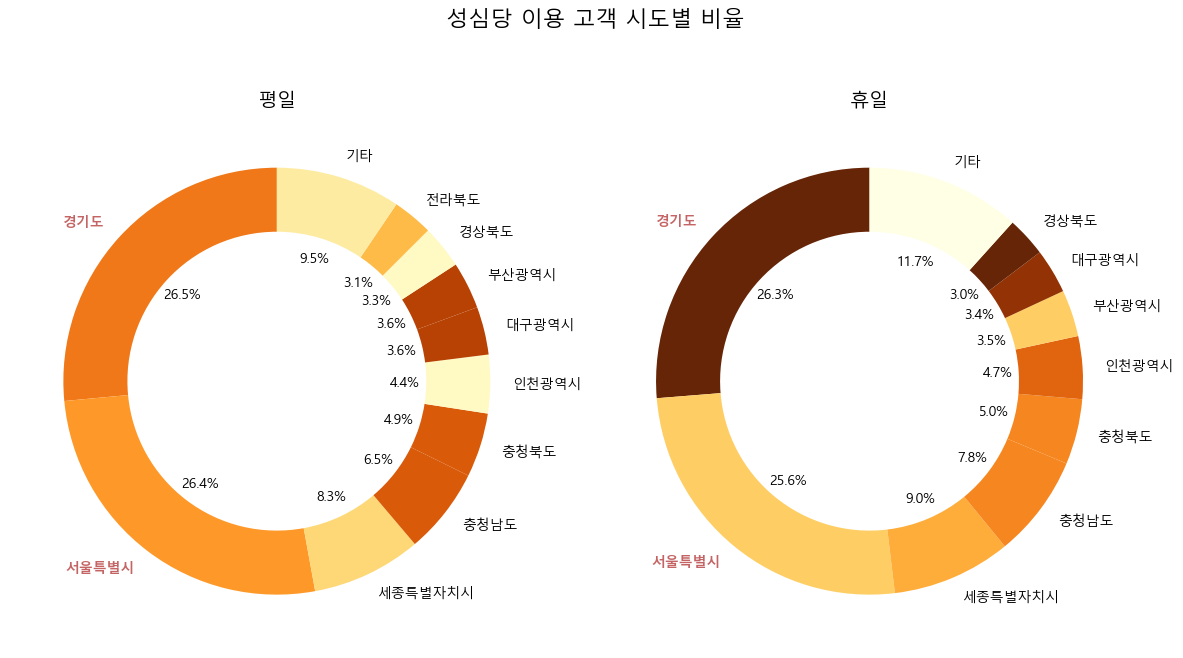

In [59]:
import random

plt.rcParams['font.family'] = 'Malgun Gothic'

# 데이터 그룹화 및 유입인구 합계 계산 (필요에 따라 적절히 수정)
grouped_평일 = pd.DataFrame(ssd_평일.groupby('유입_시도명')['이용건수'].sum()).sort_values(by="이용건수", ascending=False)
grouped_휴일 = pd.DataFrame(ssd_휴일.groupby('유입_시도명')['이용건수'].sum()).sort_values(by="이용건수", ascending=False)

# 기타로 묶는 함수 정의
def combine_small_categories(purpose_data, threshold=0.03):
    total = purpose_data['이용건수'].sum()
    purpose_data['percentage'] = purpose_data['이용건수'] / total
    large_categories = purpose_data[purpose_data['percentage'] >= threshold]
    small_categories = purpose_data[purpose_data['percentage'] < threshold]
    
    if len(small_categories) > 0:
        # 기타 항목 추가
        other_sum = small_categories['이용건수'].sum()
        other_row = pd.DataFrame({'이용건수': [other_sum]}, index=['기타'])
        large_categories = pd.concat([large_categories, other_row])
    
    # percentage 열 삭제
    large_categories = large_categories.drop(columns='percentage')
    return large_categories

# 도넛형 차트 그리기 위한 함수 정의
def plot_donut_chart(data, title, ax):
    data = combine_small_categories(data)  # 기타로 묶음
    
    colors = plt.cm.get_cmap('YlOrBr', len(data))  # 색상 팔레트
    color_list = [colors(random.randint(0, len(data)-1)) for _ in range(len(data))]  # 각 조각에 랜덤 색상 적용
    
    wedges, texts, autotexts = ax.pie(
        data['이용건수'], 
        labels=data.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        wedgeprops=dict(width=0.3),
        colors=color_list  # 랜덤 색상 리스트 사용
    )
    
    # '경기도'와 '서울특별시'의 글씨를 붉은색으로 설정
    for i, text in enumerate(texts):
        if data.index[i] in ['경기도', '서울특별시']:
            text.set_color('#c46464')
            text.set_weight('bold')

    # 가운데에 텍스트 넣기
    ax.set_title(title, fontsize=14)
    for autotext in autotexts:
        autotext.set_fontsize(10)

# 그래프 그리기 위한 플롯 설정
fig, axes = plt.subplots(1, 2, figsize=(12, 7))

# 평일, 휴일 데이터에 맞춰 각각 도넛형 차트 그리기
plot_donut_chart(grouped_평일, '평일', axes[0])
plot_donut_chart(grouped_휴일, '휴일', axes[1])

# 전체 제목 설정
plt.suptitle('성심당 이용 고객 시도별 비율', fontsize=16)

# 레이아웃 조정 및 그래프 표시
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### 3. 평일/주말 시간대별 방문자 유형 상위 5개

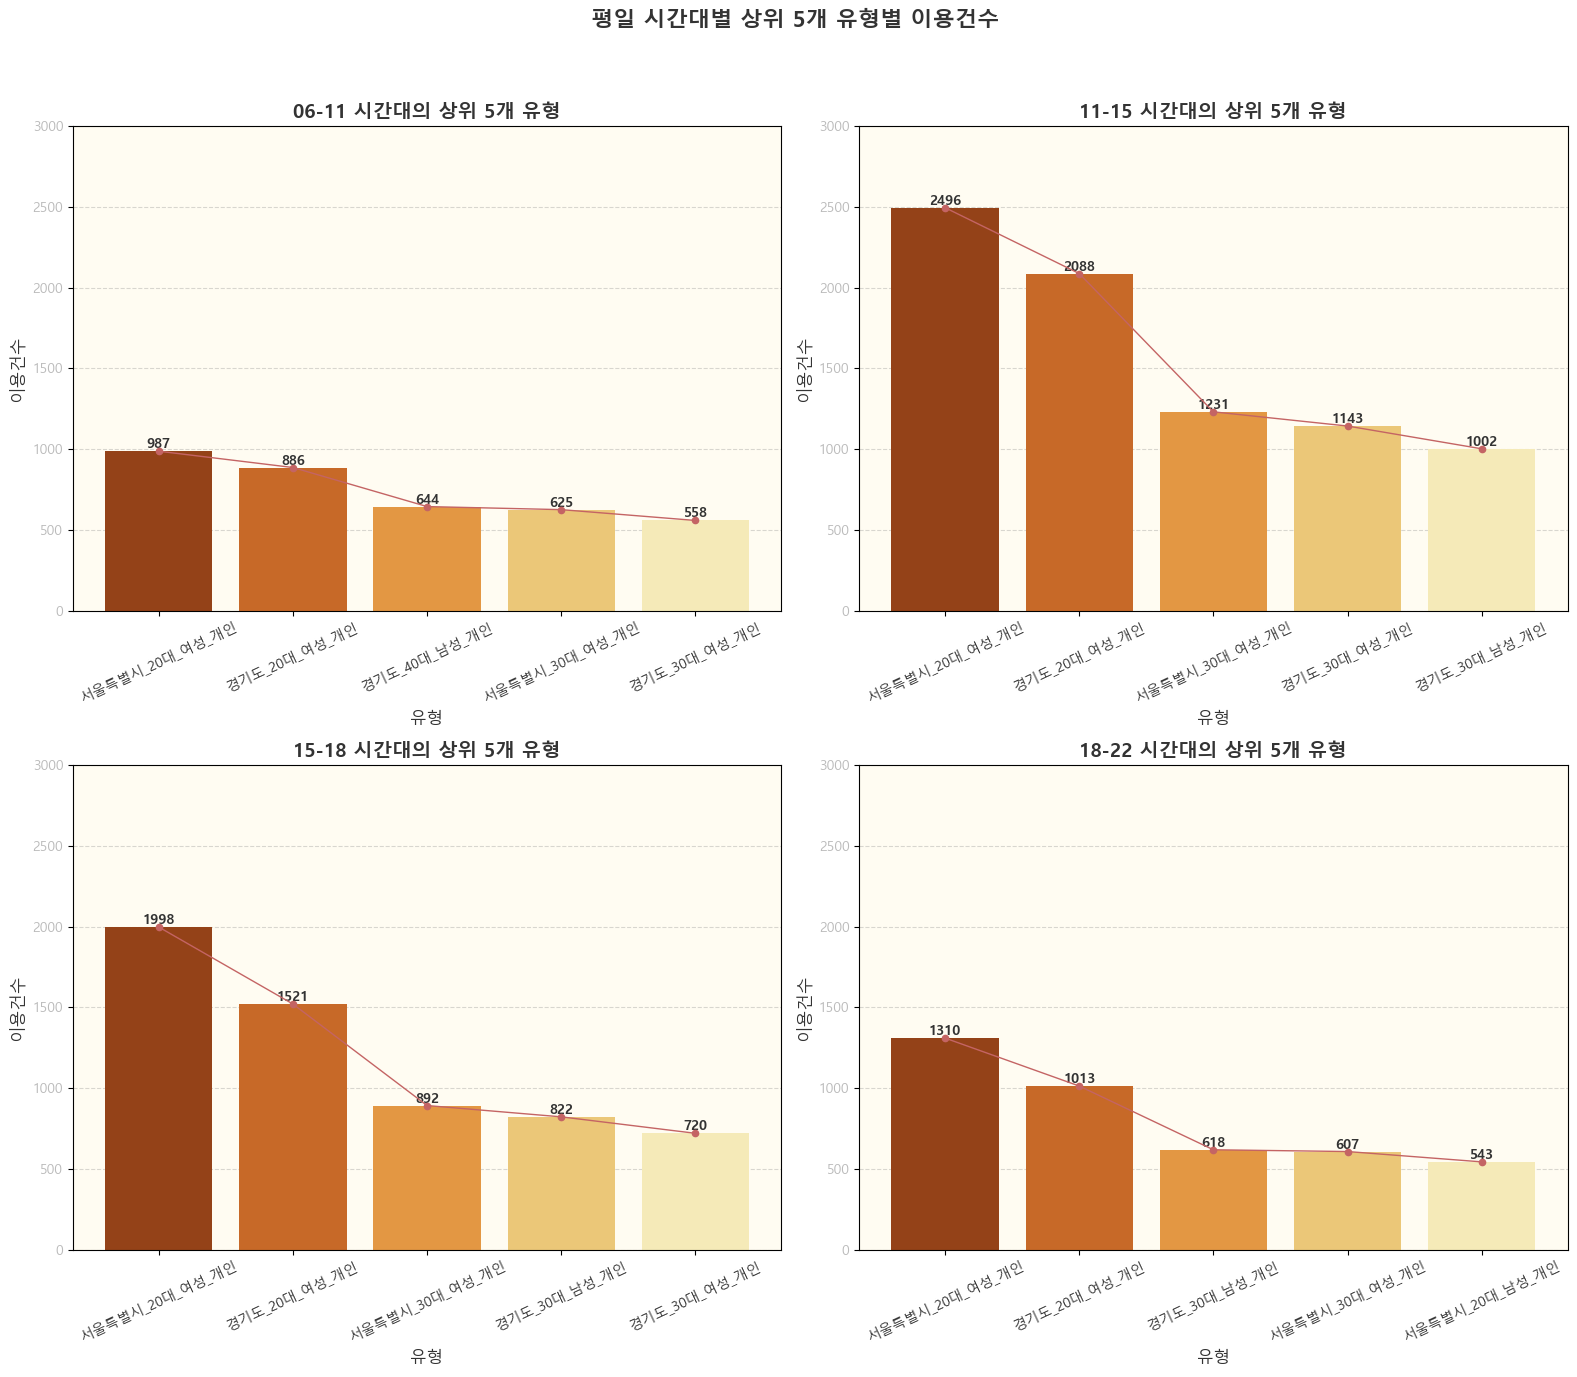

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 폰트 설정 (NanumGothic 사용)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 데이터 그룹화 및 정렬
grouped_data = ssd_평일.groupby(["구분_시간대", "유형"])[['이용건수']].sum().sort_values(by=["구분_시간대", "이용건수"], ascending=[True, False]).reset_index()

# 각 시간대별 상위 5개의 유형만 선택
top5_per_time_slot = grouped_data.groupby('구분_시간대').head(5)

# 서브플롯 2행 2열 생성 (테두리 없음)
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.flatten()  # 2D 배열을 1D로 변환

# y축의 범위를 모든 플롯에 동일하게 설정하기 위해 최대값 구하기
y_max = 3000

# 시간대별로 그래프 생성
for i, time_slot in enumerate(top5_per_time_slot['구분_시간대'].unique()):
    # 해당 시간대의 데이터 필터링 (상위 5개 유형)
    time_slot_data = top5_per_time_slot[top5_per_time_slot['구분_시간대'] == time_slot]

    # 각 플롯 배경을 더 연한 노란색으로 설정
    axes[i].set_facecolor('#fffcf2')  # 매우 연한 노란색 (#fffcf2)
    
    # 서브플롯에 바 차트 그리기
    sns.barplot(
        x='유형', 
        y='이용건수', 
        data=time_slot_data, 
        palette=sns.color_palette("YlOrBr", n_colors=len(time_slot_data))[::-1], 
        ax=axes[i]
    )
    
    # y축 범위 동일하게 설정
    axes[i].set_ylim(0, y_max)
    
    # 그래프 제목 및 축 레이블 설정
    axes[i].set_title(f'{time_slot} 시간대의 상위 5개 유형', fontsize=14, fontweight='bold', color='#333333')
    axes[i].set_xlabel('유형', fontsize=12, color='#333333')  # x축 이름 진하게
    axes[i].set_ylabel('이용건수', fontsize=12, color='#333333')  # y축 이름 진하게
    
    # x축 레이블 회전 각도를 줄이고 레이블 색상을 진하게
    axes[i].tick_params(axis='x', rotation=25, labelsize=10, labelcolor='#333333')  # 범주 이름은 진하게
    axes[i].tick_params(axis='y', labelsize=10, labelcolor='#bbbbbb')  # y축 눈금 숫자만 연하게
    
    # 막대 위에 격자가 보이지 않도록 격자를 뒤로 배치하고 하얀색으로 설정
    axes[i].grid(True, axis='y', linestyle='--', color='gray', alpha=0.3, zorder=0)
    
    # 바 차트의 zorder를 높게 설정하여 격자보다 위에 오도록 설정
    for patch in axes[i].patches:
        patch.set_zorder(2)
        
        # 각 막대 위에 이용건수 값을 표시
        height = patch.get_height()
        axes[i].text(
            patch.get_x() + patch.get_width() / 2., 
            height, 
            f'{int(height)}', 
            ha='center', 
            va='bottom', 
            fontsize=10, 
            fontweight='bold', 
            color='#333333'
        )
    
    # 막대 끝부분을 연결하는 꺾은선 그래프 추가 (갈색 선, 얇게 설정, 마커 크기 조절)
    x_coords = [patch.get_x() + patch.get_width() / 2 for patch in axes[i].patches]
    y_coords = [patch.get_height() for patch in axes[i].patches]
    
    axes[i].plot(x_coords, y_coords, color='#c46464', marker='o', linestyle='-', linewidth=1, markersize=4.5, zorder=3)

# 남은 빈 서브플롯 숨기기
for j in range(len(top5_per_time_slot['구분_시간대'].unique()), len(axes)):
    fig.delaxes(axes[j])

# 전체 제목 추가
fig.suptitle('평일 시간대별 상위 5개 유형별 이용건수', fontsize=16, fontweight='bold', color='#333333')

# 여백 및 레이아웃 조정
plt.tight_layout(rect=[0, 0, 1, 0.95])

# 그래프 출력
plt.show()


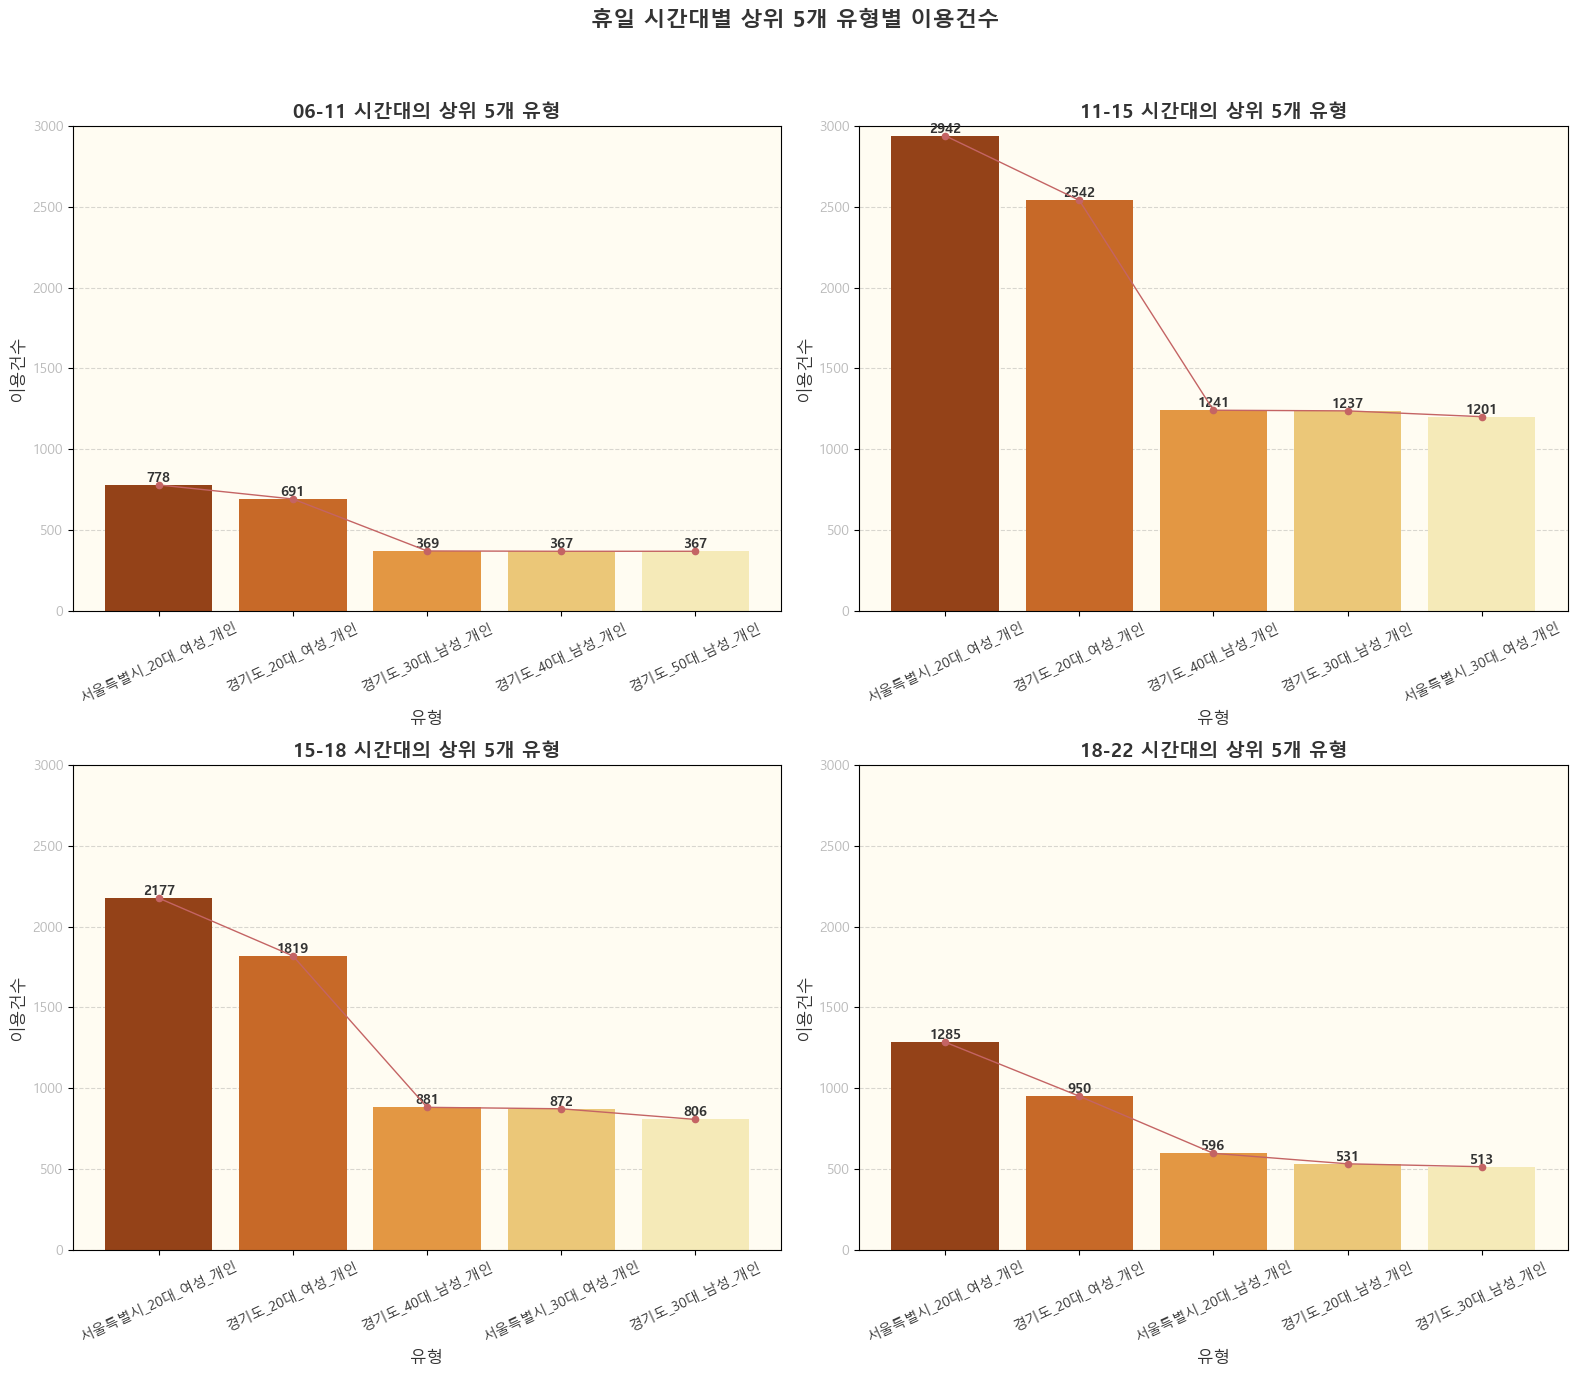

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 폰트 설정 (NanumGothic 사용)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 데이터 그룹화 및 정렬
grouped_data = ssd_휴일.groupby(["구분_시간대", "유형"])[['이용건수']].sum().sort_values(by=["구분_시간대", "이용건수"], ascending=[True, False]).reset_index()

# 각 시간대별 상위 5개의 유형만 선택
top5_per_time_slot = grouped_data.groupby('구분_시간대').head(5)

# 서브플롯 2행 2열 생성 (테두리 없음)
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.flatten()  # 2D 배열을 1D로 변환

# y축의 범위를 모든 플롯에 동일하게 설정하기 위해 최대값 구하기
y_max = 3000

# 시간대별로 그래프 생성
for i, time_slot in enumerate(top5_per_time_slot['구분_시간대'].unique()):
    # 해당 시간대의 데이터 필터링 (상위 5개 유형)
    time_slot_data = top5_per_time_slot[top5_per_time_slot['구분_시간대'] == time_slot]

    # 각 플롯 배경을 더 연한 노란색으로 설정
    axes[i].set_facecolor('#fffcf2')  # 매우 연한 노란색 (#fffcf2)
    
    # 서브플롯에 바 차트 그리기
    sns.barplot(
        x='유형', 
        y='이용건수', 
        data=time_slot_data, 
        palette=sns.color_palette("YlOrBr", n_colors=len(time_slot_data))[::-1], 
        ax=axes[i]
    )
    
    # y축 범위 동일하게 설정
    axes[i].set_ylim(0, y_max)
    
    # 그래프 제목 및 축 레이블 설정
    axes[i].set_title(f'{time_slot} 시간대의 상위 5개 유형', fontsize=14, fontweight='bold', color='#333333')
    axes[i].set_xlabel('유형', fontsize=12, color='#333333')  # x축 이름 진하게
    axes[i].set_ylabel('이용건수', fontsize=12, color='#333333')  # y축 이름 진하게
    
    # x축 레이블 회전 각도를 줄이고 레이블 색상을 진하게
    axes[i].tick_params(axis='x', rotation=25, labelsize=10, labelcolor='#333333')  # 범주 이름은 진하게
    axes[i].tick_params(axis='y', labelsize=10, labelcolor='#bbbbbb')  # y축 눈금 숫자만 연하게
    axes[i].grid(True, axis='y', linestyle='--', color='gray', alpha=0.3, zorder=0)
   
    # 바 차트의 zorder를 높게 설정하여 격자보다 위에 오도록 설정
    for patch in axes[i].patches:
        patch.set_zorder(2)
        
        # 각 막대 위에 이용건수 값을 표시
        height = patch.get_height()
        axes[i].text(
            patch.get_x() + patch.get_width() / 2., 
            height, 
            f'{int(height)}', 
            ha='center', 
            va='bottom', 
            fontsize=10, 
            fontweight='bold', 
            color='#333333'
        )
    
    # 막대 끝부분을 연결하는 꺾은선 그래프 추가 (갈색 선, 얇게 설정, 마커 크기 조절)
    x_coords = [patch.get_x() + patch.get_width() / 2 for patch in axes[i].patches]
    y_coords = [patch.get_height() for patch in axes[i].patches]
    
    axes[i].plot(x_coords, y_coords, color='#c46464', marker='o', linestyle='-', linewidth=1, markersize=4.5, zorder=3)

# 남은 빈 서브플롯 숨기기
for j in range(len(top5_per_time_slot['구분_시간대'].unique()), len(axes)):
    fig.delaxes(axes[j])

# 전체 제목 추가
fig.suptitle('휴일 시간대별 상위 5개 유형별 이용건수', fontsize=16, fontweight='bold', color='#333333')

# 여백 및 레이아웃 조정
plt.tight_layout(rect=[0, 0, 1, 0.95])

# 그래프 출력
plt.show()


### 4. 각 유형별 소비 패턴

In [62]:
# 일단 업종 범위 줄이기
hdong_combined_관광 = hdong_combined[(hdong_combined['업종중분류'] == 47) | (hdong_combined['업종대분류'] == "I") | (hdong_combined['업종대분류'] == "R")]
hdong_combined_관광['유형'] = hdong_combined_관광['유입_시도명'] + '_' + hdong_combined_관광['연령'].astype('int').astype('str') + '0대_' + hdong_combined_관광['성별'] + '_' + hdong_combined_관광['구분_개인법인']
hdong_combined_관광['휴일평일_시간대'] = hdong_combined_관광['구분_휴일평일'] + '_' + hdong_combined_관광['구분_시간대']

In [63]:
top5_types =['서울특별시_20대_여성_개인', '경기도_20대_여성_개인', '서울특별시_30대_여성_개인', '경기도_30대_여성_개인',
'경기도_30대_남성_개인', '경기도_40대_남성_개인', '서울특별시_20대_남성_개인', '경기도_50대_남성_개인']

In [64]:
top5_관광 = hdong_combined_관광[hdong_combined_관광['유형'].isin(top5_types)]
top5_관광 = top5_관광[top5_관광['유입_시도명'].isin(['서울특별시', '경기도'])]
top5_관광['유형2'] = top5_관광['연령'].astype('int').astype('str') + '0대_' + top5_관광['성별'] + '_' + top5_관광['구분_개인법인']
top5_관광_grouped = top5_관광.groupby(['유형2', '구분_시간대', '항목명'])[['이용건수']].sum().sort_values(by=['유형2', '구분_시간대', '이용건수'],
                                                                                    ascending=[True, True, False])
top5_관광_grouped_reset = top5_관광_grouped.reset_index()

In [65]:
# 20~30대 여성 그룹화
top5_관광_grouped_reset.loc[
    (top5_관광_grouped_reset['유형2'] == "20대_여성_개인") | (top5_관광_grouped_reset['유형2'] == "30대_여성_개인"),
    '유형3'
] = "20~30대 여성"

# 20~30대 남성 그룹화
top5_관광_grouped_reset.loc[
    (top5_관광_grouped_reset['유형2'] == "20대_남성_개인") | (top5_관광_grouped_reset['유형2'] == "30대_남성_개인"),
    '유형3'
] = "20~30대 남성"

# 나머지 경우 (40~50대 남성)
top5_관광_grouped_reset.loc[
    ~(top5_관광_grouped_reset['유형2'].isin(["20대_여성_개인", "30대_여성_개인", "20대_남성_개인", "30대_남성_개인"])),
    '유형3'
] = "40~50대 남성"


In [66]:
top5_관광_grouped_reset

,유형2,구분_시간대,항목명,이용건수,유형3
0,20대_남성_개인,06-11,체인화 편의점,723,20~30대 남성
1,20대_남성_개인,06-11,제과점업,640,20~30대 남성
2,20대_남성_개인,06-11,커피 전문점,209,20~30대 남성
3,20대_남성_개인,06-11,한식 일반 음식점업,106,20~30대 남성
4,20대_남성_개인,06-11,슈퍼마켓,99,20~30대 남성
...,...,...,...,...,...
1295,50대_남성_개인,22-06,육류 소매업,2,40~50대 남성
1296,50대_남성_개인,22-06,전자 게임장 운영업,2,40~50대 남성
1297,50대_남성_개인,22-06,그 외 기타 분류 안된 상품 전문 소매업,1,40~50대 남성
1298,50대_남성_개인,22-06,"신선, 냉동 및 기타 수산물 소매업",1,40~50대 남성


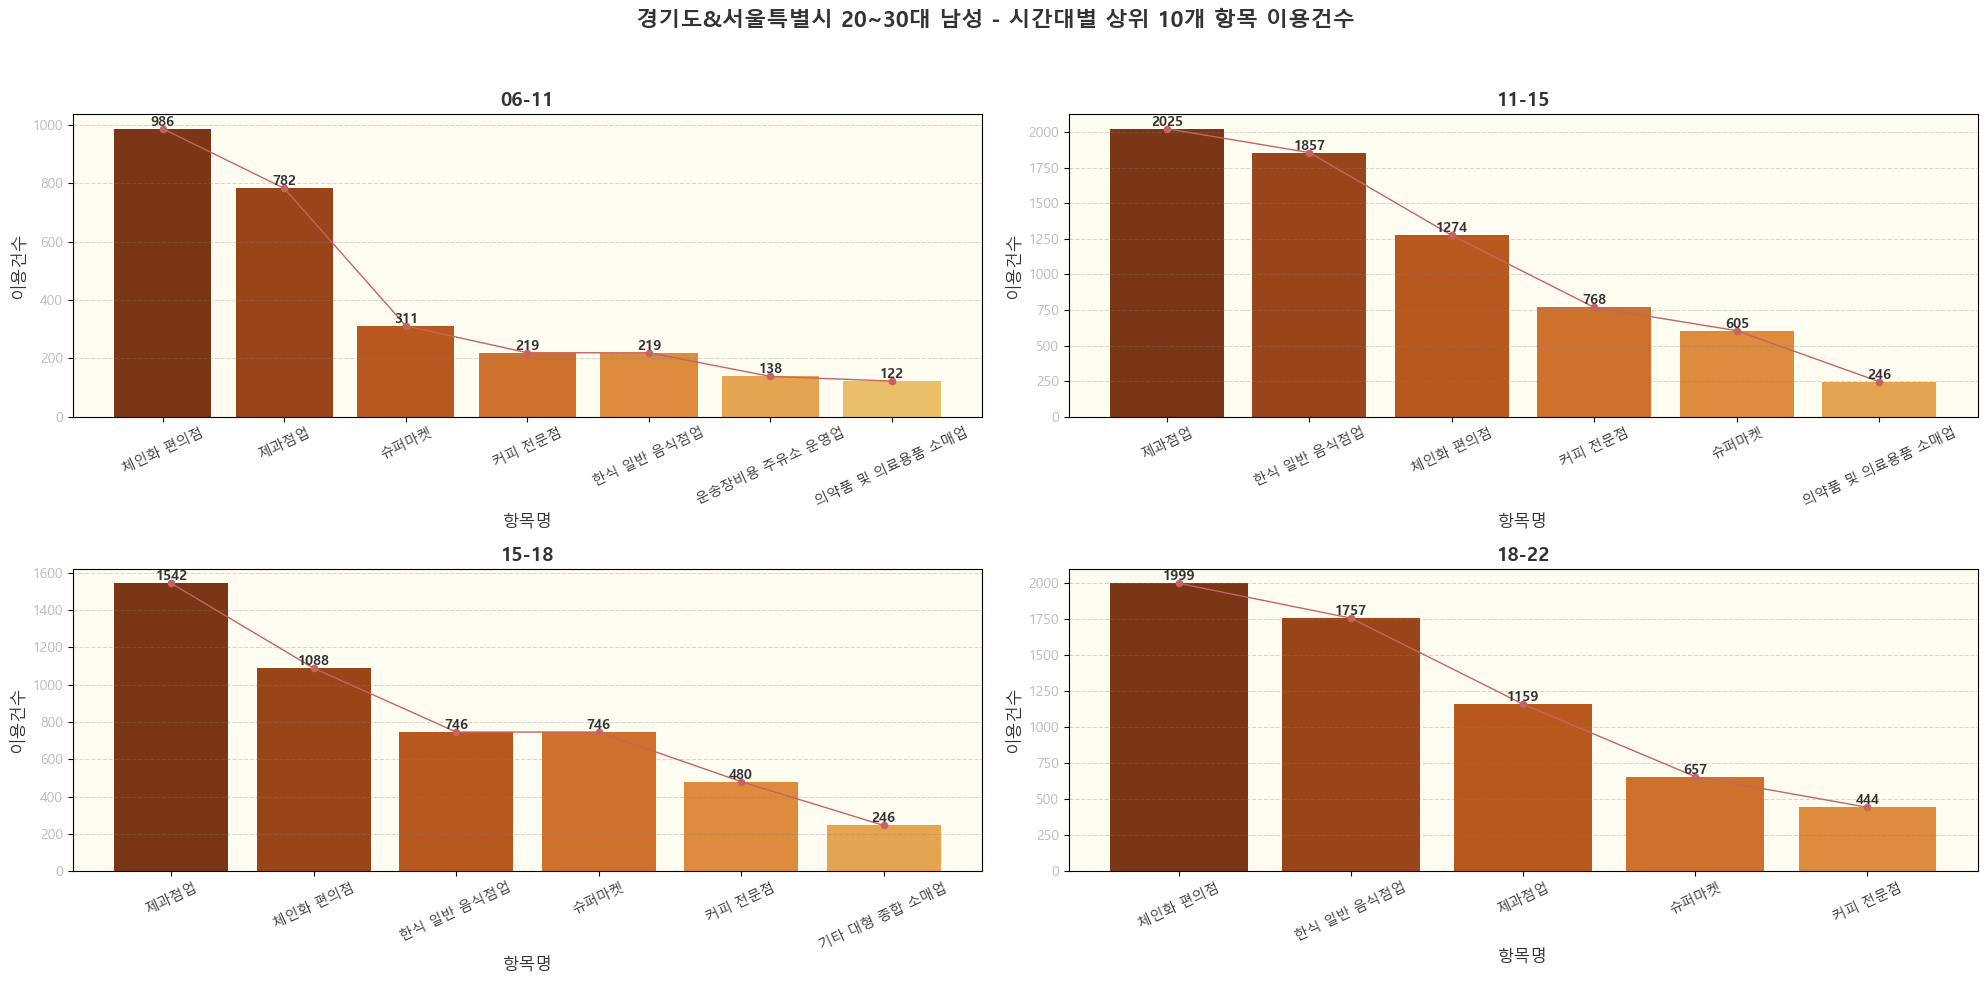

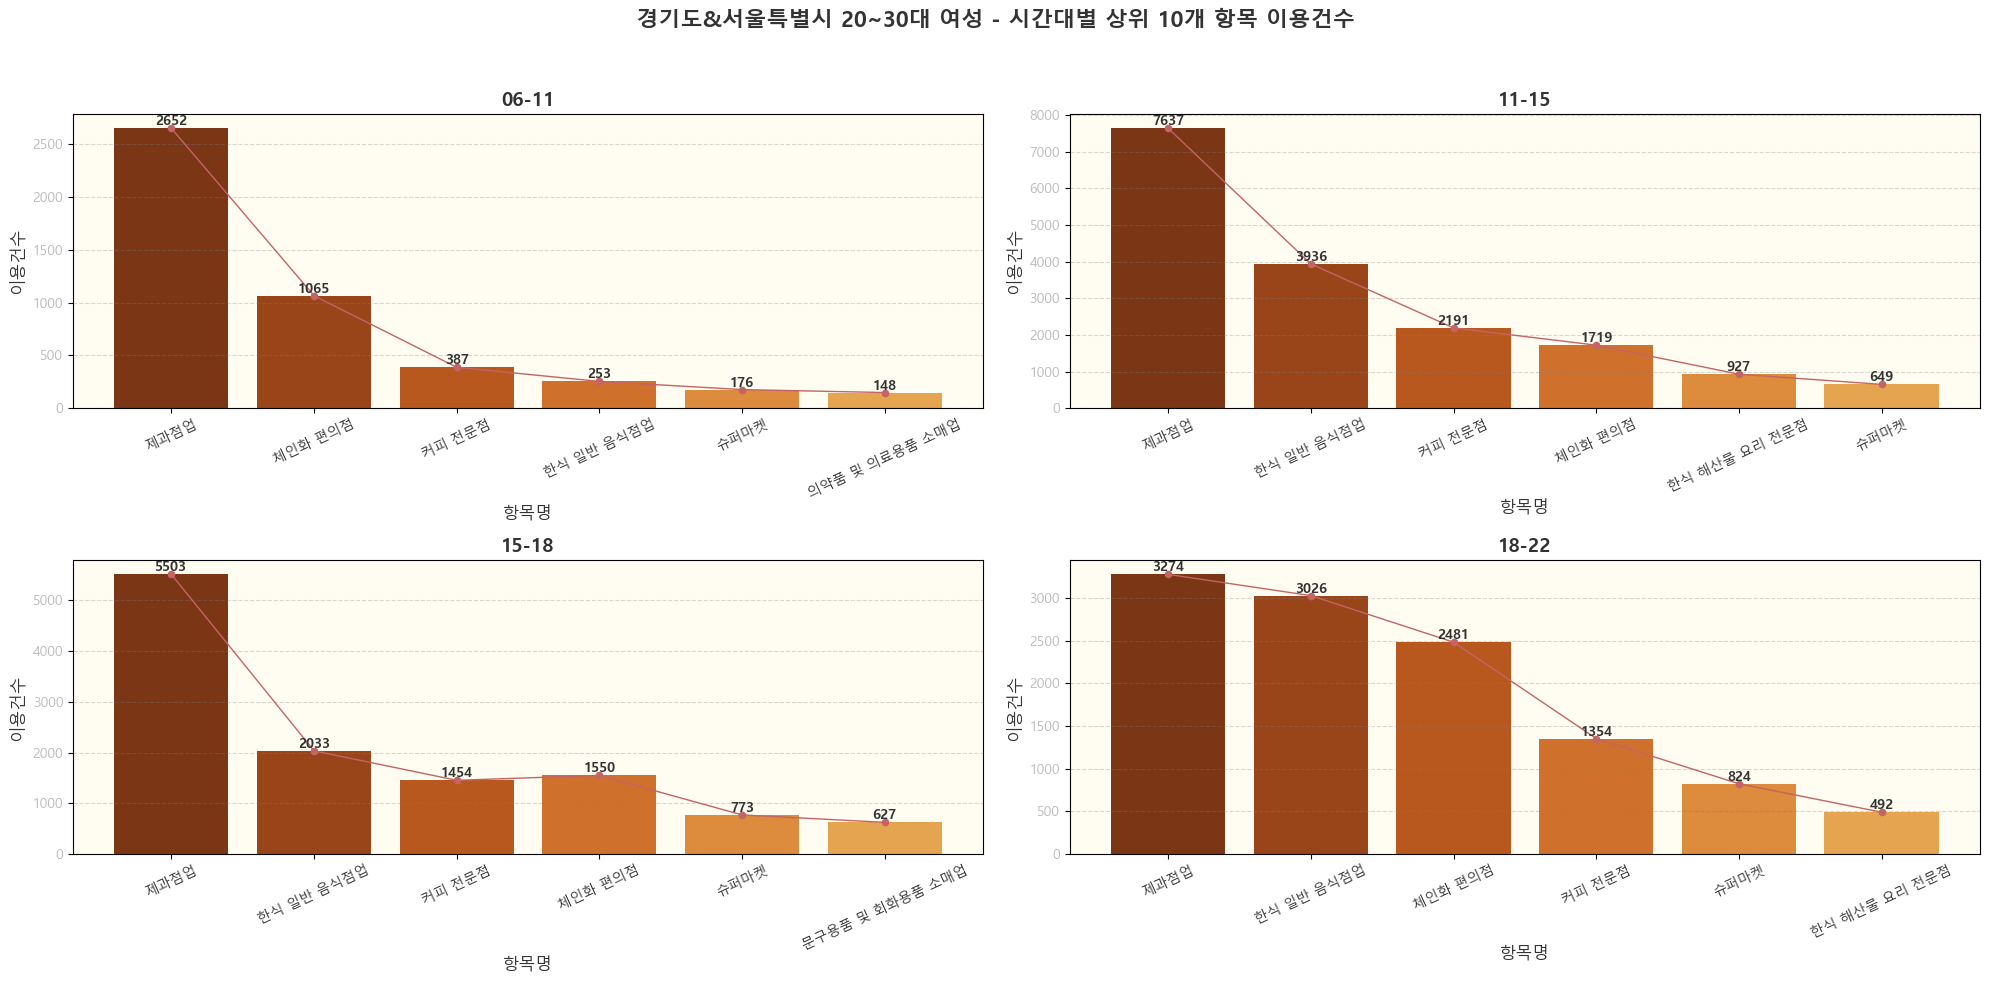

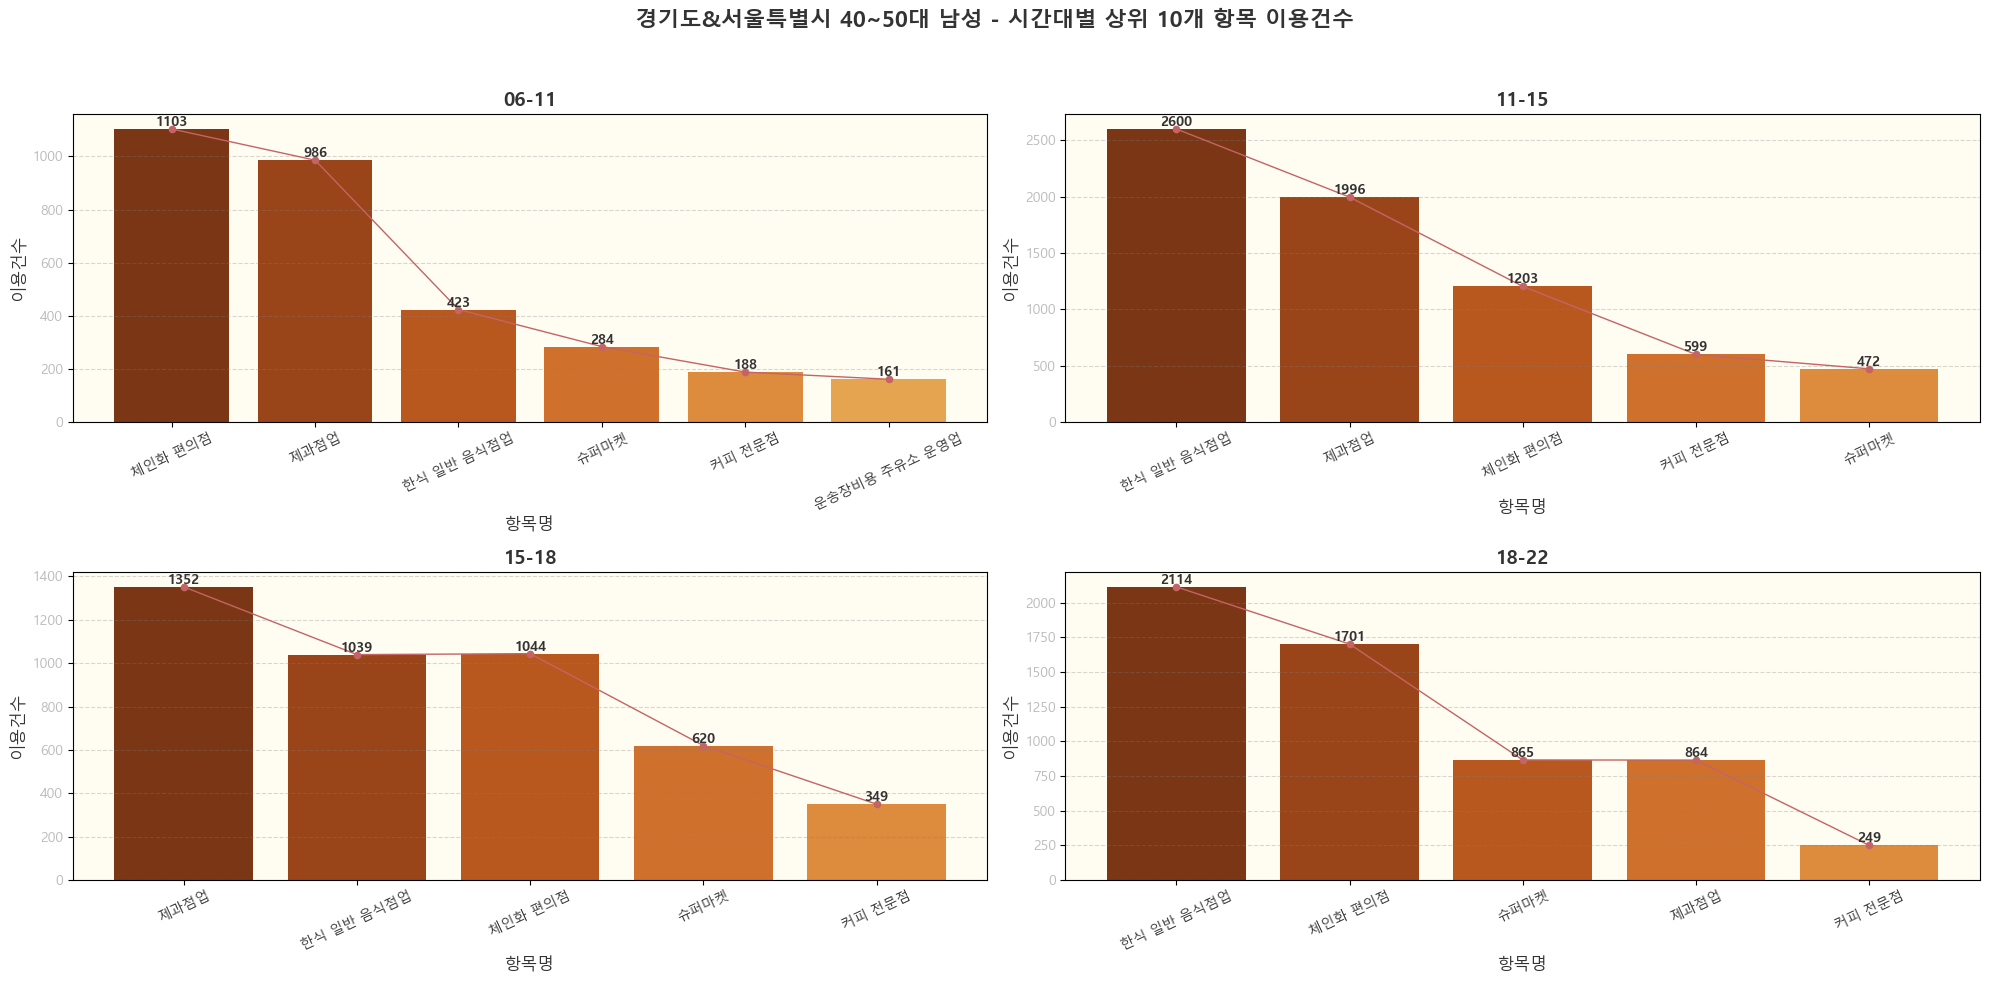

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'

# 각 유형3마다 2x2 플롯으로 그리기 위한 설정
for 유형3 in top5_관광_grouped_reset['유형3'].unique():
    # 해당 유형에 대한 데이터 필터링
    type_data = top5_관광_grouped_reset[top5_관광_grouped_reset['유형3'] == 유형3]
    
    if type_data.empty:
        print(f"{유형3}에 대한 데이터가 없습니다.")
        continue
    
    # 시간대별로 상위 10개 항목을 시각화 (최대 4개의 시간대만 선택)
    time_slots = type_data['구분_시간대'].unique()[:4]

    if len(time_slots) == 0:
        print(f"{유형3}에 해당하는 시간대 데이터가 없습니다.")
        continue

    fig, axes = plt.subplots(2, 2, figsize=(20, 10))
    axes = axes.flatten()  # 2x2 배열을 1차원으로 변환

    for i, time_slot in enumerate(time_slots):
        # 시간대 데이터 필터링
        time_slot_data = type_data[type_data['구분_시간대'] == time_slot].nlargest(10, '이용건수')

        if time_slot_data.empty:
            print(f"{time_slot} 시간대에 대한 데이터가 없습니다.")
            continue

        # 플롯에 배경 설정 및 막대 그래프 그리기
        axes[i].set_facecolor('#fffcf2')
        sns.barplot(
            x='항목명', 
            y='이용건수', 
            data=time_slot_data, 
            palette=sns.color_palette("YlOrBr", n_colors=len(time_slot_data))[::-1], 
            ax=axes[i],
            ci=None
        )

        # 제목 및 기타 설정
        axes[i].set_title(f'{time_slot}', fontsize=14, fontweight='bold', color='#333333')
        axes[i].set_xlabel('항목명', fontsize=12, color='#333333')
        axes[i].set_ylabel('이용건수', fontsize=12, color='#333333')

        # x축 레이블 설정
        axes[i].tick_params(axis='x', rotation=25, labelsize=10, labelcolor='#333333')
        axes[i].tick_params(axis='y', labelsize=10, labelcolor='#bbbbbb')
        axes[i].grid(True, axis='y', linestyle='--', color='gray', alpha=0.3, zorder=0)


        # 막대 끝부분을 연결하는 꺾은선 그래프 추가
        x_coords = [patch.get_x() + patch.get_width() / 2 for patch in axes[i].patches]
        y_coords = [patch.get_height() for patch in axes[i].patches]
        axes[i].plot(x_coords, y_coords, color='#c46464', marker='o', linestyle='-', linewidth=1, markersize=4.5, zorder=3)

        # 막대 위에 이용건수 표시
        for patch in axes[i].patches:
            height = patch.get_height()
            axes[i].text(
                patch.get_x() + patch.get_width() / 2., 
                height, 
                f'{int(height)}', 
                ha='center', 
                va='bottom', 
                fontsize=10, 
                fontweight='bold', 
                color='#333333'
            )

    # 남은 빈 서브플롯 숨기기
    for j in range(len(time_slots), 4):
        fig.delaxes(axes[j])

    # 전체 제목 설정
    plt.suptitle(f'경기도&서울특별시 {유형3} - 시간대별 상위 10개 항목 이용건수', fontsize=16, fontweight='bold', color='#333333')
    
    # 레이아웃 조정 및 그래프 출력
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


In [68]:
#pip freeze > requirements(2-1).txt